In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')

In [44]:
df = pd.read_csv(f'data/city_day.csv')
city = ['Bengaluru','Mumbai','Delhi','Chennai','Kolkata']
pop = [8443675,12442373,11034555,4646732,4496694]
df = df[df['City'].isin(city)]
df.Date = pd.to_datetime(df.Date,format='%Y-%m-%d')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
4294,Bengaluru,2015-01-01,NaN,NaN,3.26,17.33,10.88,20.36,0.33,3.54,10.73,0.56,4.64,NaN,NaN,NaN
4295,Bengaluru,2015-01-02,NaN,NaN,6.05,19.73,14.14,23.74,1.35,3.97,22.77,0.65,5.31,NaN,NaN,NaN
4296,Bengaluru,2015-01-03,NaN,NaN,11.91,19.88,20.72,4.32,17.40,13.61,12.03,0.53,19.25,NaN,NaN,NaN
4297,Bengaluru,2015-01-04,NaN,NaN,7.45,21.61,16.88,0.87,5.05,6.52,17.70,0.55,7.47,NaN,NaN,NaN
4298,Bengaluru,2015-01-05,NaN,NaN,9.52,22.17,21.76,31.38,1.83,4.71,12.72,0.40,4.36,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23859,Mumbai,2020-06-27,18.04,63.72,28.29,8.58,36.07,26.69,0.43,10.36,5.68,0.82,NaN,NaN,64.0,Satisfactory
23860,Mumbai,2020-06-28,12.33,44.84,27.15,8.06,34.78,26.50,0.38,10.58,5.76,0.85,NaN,NaN,64.0,Satisfactory
23861,Mumbai,2020-06-29,7.88,27.51,26.58,7.94,34.42,23.94,0.38,11.11,5.84,0.47,NaN,NaN,54.0,Satisfactory
23862,Mumbai,2020-06-30,4.66,13.87,25.25,8.02,33.25,19.89,0.36,13.40,6.94,0.73,NaN,NaN,54.0,Satisfactory


In [120]:
city = ['Bengaluru','Chennai','Delhi','Mumbai','Kolkata']
pop = [8443675,12442373,11034555,4646732,4496694]
pollutant =['PM2.5','PM10','NO2','SO2','CO']
df['pop'] = df['PM2.5']

In [121]:
for i in range(df.shape[0]):
    for j in range(0,5):
        if df['City'].iloc[i] == city[j]:
            df['pop'].iloc[i] = pop[j]
df

/home/yash/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Toluene,Xylene,AQI,AQI_Bucket,pop,perpm2.5,perpm10,perno2,perso2,pero3
4294,Bengaluru,2015-01-01,NaN,NaN,3.26,17.33,10.88,20.36,0.33,3.54,...,4.64,NaN,NaN,NaN,8443675.0,NaN,NaN,20.524239,4.192487,0.390825
4295,Bengaluru,2015-01-02,NaN,NaN,6.05,19.73,14.14,23.74,1.35,3.97,...,5.31,NaN,NaN,NaN,8443675.0,NaN,NaN,23.366603,4.701744,1.598830
4296,Bengaluru,2015-01-03,NaN,NaN,11.91,19.88,20.72,4.32,17.40,13.61,...,19.25,NaN,NaN,NaN,8443675.0,NaN,NaN,23.544251,16.118574,20.607141
4297,Bengaluru,2015-01-04,NaN,NaN,7.45,21.61,16.88,0.87,5.05,6.52,...,7.47,NaN,NaN,NaN,8443675.0,NaN,NaN,25.593121,7.721756,5.980808
4298,Bengaluru,2015-01-05,NaN,NaN,9.52,22.17,21.76,31.38,1.83,4.71,...,4.36,NaN,NaN,NaN,8443675.0,NaN,NaN,26.256340,5.578140,2.167303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23859,Mumbai,2020-06-27,18.04,63.72,28.29,8.58,36.07,26.69,0.43,10.36,...,NaN,NaN,64.0,Satisfactory,4646732.0,38.822984,137.128631,18.464590,22.295239,0.925382
23860,Mumbai,2020-06-28,12.33,44.84,27.15,8.06,34.78,26.50,0.38,10.58,...,NaN,NaN,64.0,Satisfactory,4646732.0,26.534778,96.497926,17.345524,22.768690,0.817779
23861,Mumbai,2020-06-29,7.88,27.51,26.58,7.94,34.42,23.94,0.38,11.11,...,NaN,NaN,54.0,Satisfactory,4646732.0,16.958155,59.202898,17.087278,23.909276,0.817779
23862,Mumbai,2020-06-30,4.66,13.87,25.25,8.02,33.25,19.89,0.36,13.40,...,NaN,NaN,54.0,Satisfactory,4646732.0,10.028553,29.848935,17.259442,28.837471,0.774738


In [122]:
df['perpm2.5'] = df['PM2.5'] / df['pop'] * 10000000
df['perpm10'] = df['PM10'] / df['pop'] * 10000000
df['perno2'] = df['NO2'] / df['pop'] * 10000000
df['perso2'] = df['SO2'] / df['pop'] * 10000000
df['pero3'] = df['CO'] / df['pop'] * 10000000
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Toluene,Xylene,AQI,AQI_Bucket,pop,perpm2.5,perpm10,perno2,perso2,pero3
4294,Bengaluru,2015-01-01,NaN,NaN,3.26,17.33,10.88,20.36,0.33,3.54,...,4.64,NaN,NaN,NaN,8443675.0,NaN,NaN,20.524239,4.192487,0.390825
4295,Bengaluru,2015-01-02,NaN,NaN,6.05,19.73,14.14,23.74,1.35,3.97,...,5.31,NaN,NaN,NaN,8443675.0,NaN,NaN,23.366603,4.701744,1.598830
4296,Bengaluru,2015-01-03,NaN,NaN,11.91,19.88,20.72,4.32,17.40,13.61,...,19.25,NaN,NaN,NaN,8443675.0,NaN,NaN,23.544251,16.118574,20.607141
4297,Bengaluru,2015-01-04,NaN,NaN,7.45,21.61,16.88,0.87,5.05,6.52,...,7.47,NaN,NaN,NaN,8443675.0,NaN,NaN,25.593121,7.721756,5.980808
4298,Bengaluru,2015-01-05,NaN,NaN,9.52,22.17,21.76,31.38,1.83,4.71,...,4.36,NaN,NaN,NaN,8443675.0,NaN,NaN,26.256340,5.578140,2.167303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23859,Mumbai,2020-06-27,18.04,63.72,28.29,8.58,36.07,26.69,0.43,10.36,...,NaN,NaN,64.0,Satisfactory,4646732.0,38.822984,137.128631,18.464590,22.295239,0.925382
23860,Mumbai,2020-06-28,12.33,44.84,27.15,8.06,34.78,26.50,0.38,10.58,...,NaN,NaN,64.0,Satisfactory,4646732.0,26.534778,96.497926,17.345524,22.768690,0.817779
23861,Mumbai,2020-06-29,7.88,27.51,26.58,7.94,34.42,23.94,0.38,11.11,...,NaN,NaN,54.0,Satisfactory,4646732.0,16.958155,59.202898,17.087278,23.909276,0.817779
23862,Mumbai,2020-06-30,4.66,13.87,25.25,8.02,33.25,19.89,0.36,13.40,...,NaN,NaN,54.0,Satisfactory,4646732.0,10.028553,29.848935,17.259442,28.837471,0.774738


In [123]:
df19 = df[df['Date'].dt.year.isin([2019])]
df20 = df[df['Date'].dt.year.isin([2020])]

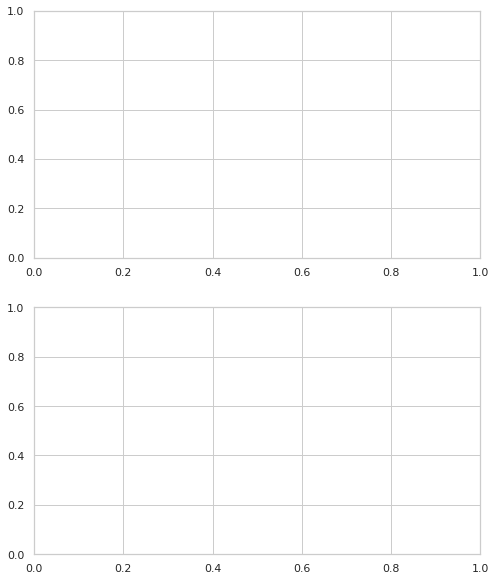

In [124]:
fig, ax = plt.subplots(2,1,figsize=(8,10))

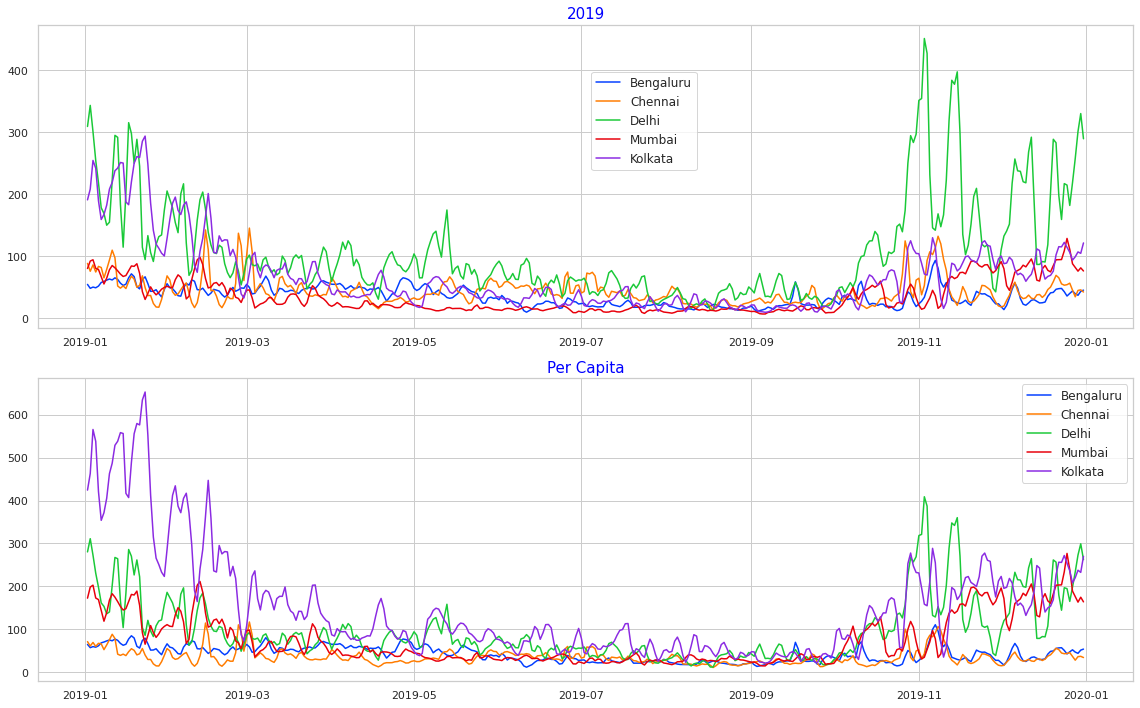

In [125]:
fig, ax = plt.subplots(2,1,figsize=(16,10))
a=ax[0]
for i in city:
    dff = df19[df19['City'].isin([i])]
    dffroll = dff.rolling(window=2,on='Date').mean()
    a.plot(dffroll.Date,dffroll['PM2.5'],label=i)
    a.set_title('2019',fontsize=15, c='blue')
a.legend(bbox_to_anchor=(0.5, 0.5),fontsize=12,frameon=True)
a=ax[1]
for i in city:
    dff = df19[df19['City'].isin([i])]
    dffroll = dff.rolling(window=2,on='Date').mean()
    a.plot(dffroll.Date,dffroll['perpm2.5'],label=i)
    a.set_title('Per Capita',fontsize=15, c='blue')
a.legend(fontsize=12,frameon=True)
plt.tight_layout()
plt.show
fig.savefig(f'images/percappm252019.png',bbox_inches='tight')

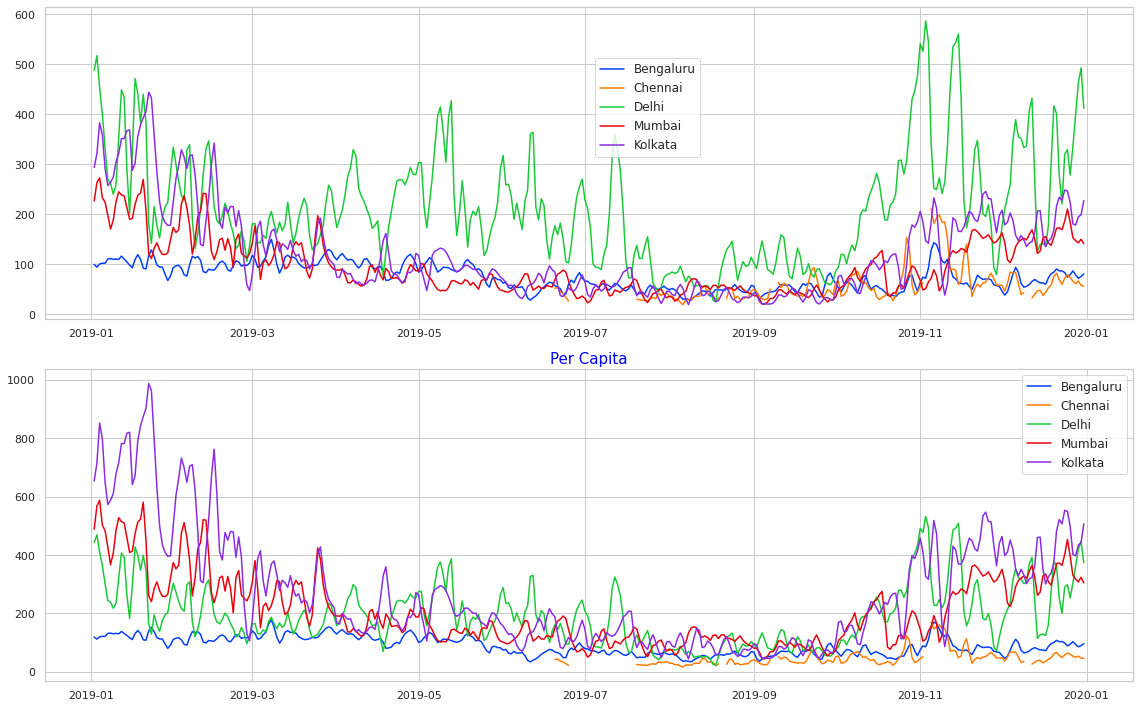

In [126]:
fig, ax = plt.subplots(2,1,figsize=(16,10))
a=ax[0]
for i in city:
    dff = df19[df19['City'].isin([i])]
    dffroll = dff.rolling(window=2,on='Date').mean()
    a.plot(dffroll.Date,dffroll['PM10'],label=i)
a.legend(bbox_to_anchor=(0.5, 0.5),fontsize=12,frameon=True)
a=ax[1]
for i in city:
    dff = df19[df19['City'].isin([i])]
    dffroll = dff.rolling(window=2,on='Date').mean()
    a.plot(dffroll.Date,dffroll['perpm10'],label=i)
    a.set_title('Per Capita',fontsize=15, c='blue')
a.legend(fontsize=12,frameon=True)
plt.tight_layout()
plt.show
fig.savefig(f'images/percappm102019.png',bbox_inches='tight')

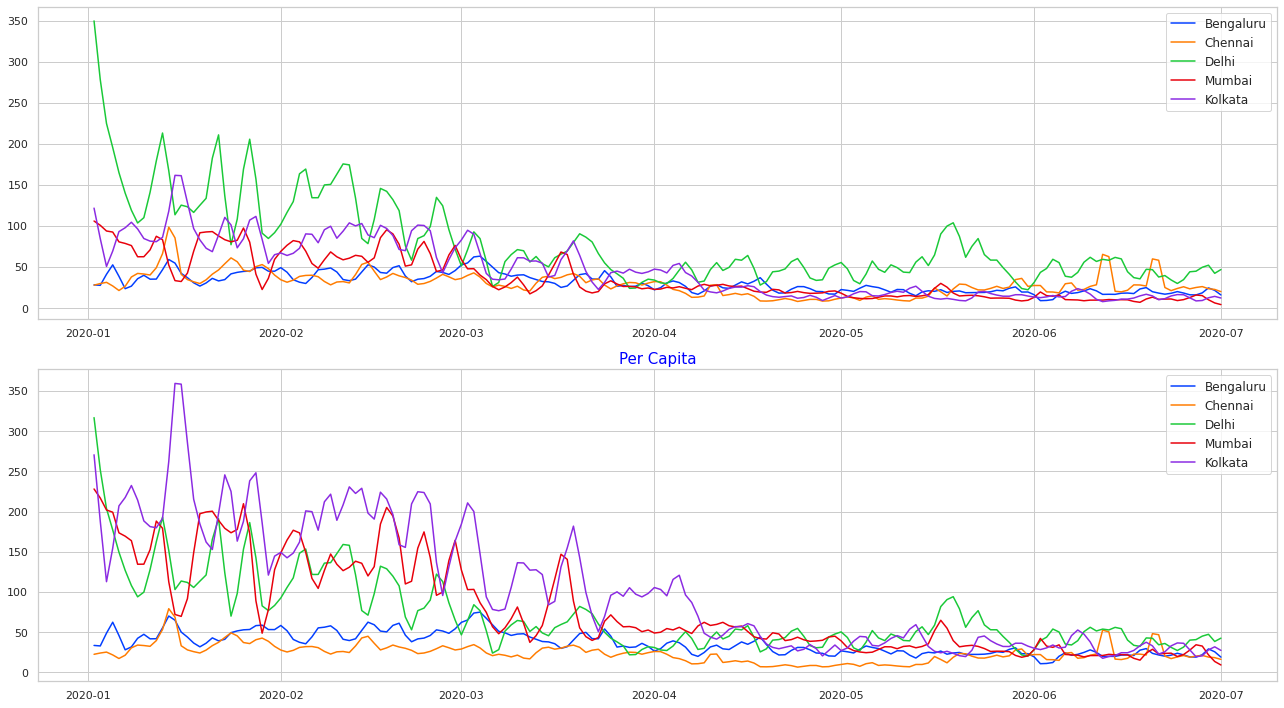

In [128]:
fig, ax = plt.subplots(2,1,figsize=(18,10))
a=ax[0]
for i in city:
    dff = df20[df20['City'].isin([i])]
    dffroll = dff.rolling(window=2,on='Date').mean()
    a.plot(dffroll.Date,dffroll['PM2.5'],label=i)
a.legend(fontsize=12,frameon=True)
a=ax[1]
for i in city:
    dff = df20[df20['City'].isin([i])]
    dffroll = dff.rolling(window=2,on='Date').mean()
    a.plot(dffroll.Date,dffroll['perpm2.5'],label=i)
    a.set_title('Per Capita',fontsize=15, c='blue')
a.legend(fontsize=12,frameon=True)
plt.tight_layout()
plt.show
fig.savefig(f'images/percappm252020.png',bbox_inches='tight')